In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Load the data
df = pd.read_csv("gaming_processed_3.csv")

nan_values = df['Age'].isna().sum()

# Check for infinite values in the 'Age' column
inf_values = df['Age'].isin([np.inf, -np.inf]).sum()

# Print the results
print("Number of NaN values in the 'Age' column:", nan_values)
print("Number of infinite values in the 'Age' column:", inf_values)

# df.isnull().sum()  # Check for NaNs
df.isin([np.inf, -np.inf]).any()  # Check for infinities

Number of NaN values in the 'Age' column: 0
Number of infinite values in the 'Age' column: 0


GADE                  False
Game                  False
Platform              False
Hours                 False
earnings              False
whyplay               False
League                False
highestleague         False
streams               False
Narcissism            False
Gender                False
Age                   False
Work                  False
Degree                False
Birthplace            False
Residence             False
Reference             False
Playstyle             False
GAD_T                 False
SWL_T                 False
SPIN_T                False
Playstyle_category    False
whyplay_category      False
whyplay_category_2    False
dtype: bool

In [103]:
df = df.dropna(subset=['League'])
df = df.dropna(subset=['Narcissism'])
df = df.dropna(subset=['streams'])
df = df.dropna(subset=["Age"])

In [98]:
# Load the data

nan_values = df['League'].isna().sum()

# Check for infinite values in the 'Age' column
inf_values = df['League'].isin([np.inf, -np.inf]).sum()

# Print the results
print("Number of NaN values in the 'League' column:", nan_values)
print("Number of infinite values in the 'League' column:", inf_values)


Number of NaN values in the 'League' column: 0
Number of infinite values in the 'League' column: 0


In [99]:
df.shape

(12445, 24)

In [100]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['League'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'League': country_counts.index, 'Frequency': country_counts.values})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
country_counts_df

,League,Frequency
0,gold,3092
1,platinum,2524
2,unranked,2426
3,silver,2129
4,diamond,1518
5,bronze,509
6,master,181
7,challenger,57
8,legend,9


In [101]:

# Define the ordinal mapping including "Unranked"
ordinal_mapping = {
    'unranked': 0,
    'bronze': 1,
    'silver': 2,
    'gold': 3,
    'platinum': 4,
    'diamond': 5,
    'master': 6,
    'legend': 7,
    'challenger': 8
}

# Convert 'League' to ordinal using map
df['League_Ordinal'] = df['League'].map(ordinal_mapping)
df.head()

# Perform ordinal regression analysis
X = df[['Hours', 'Age', 'Narcissism', 'streams']]  # Predictor variable
y = df['League_Ordinal']            # Outcome variable

# Add constant term to predictor variable
X = sm.add_constant(X)

# Fit ordinal regression model
ordinal_model = sm.OLS(y, X)
ordinal_results = ordinal_model.fit()

# Print regression summary
print(ordinal_results.summary())

                            OLS Regression Results                            
Dep. Variable:         League_Ordinal   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     177.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.06e-147
Time:                        04:03:26   Log-Likelihood:                -24011.
No. Observations:               12445   AIC:                         4.803e+04
Df Residuals:                   12440   BIC:                         4.807e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0920      0.106     29.131      0.0

In [104]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the 'df' DataFrame with predictor variables and League_Ordinal
fig = go.Figure(data=go.Parcoords(
    line=dict(color=df['League_Ordinal'], colorscale='Viridis'),
    dimensions=list([
        dict(range=[min(df['Hours']), max(df['Hours'])], label='Hours', values=df['Hours']),
        dict(range=[min(df['Age']), max(df['Age'])], label='Age', values=df['Age']),
        dict(range=[min(df['Narcissism']), max(df['Narcissism'])], label='Narcissism', values=df['Narcissism']),
        dict(range=[min(df['streams']), max(df['streams'])], label='Streams', values=df['streams']),
    ])
))

# Update layout
fig.update_layout(
    title="Parallel Coordinate Plot of Predictor Variables by League",
    font=dict(family="Arial, sans-serif", size=12),
    title_font_size=20
)

# Show plot
fig.show()


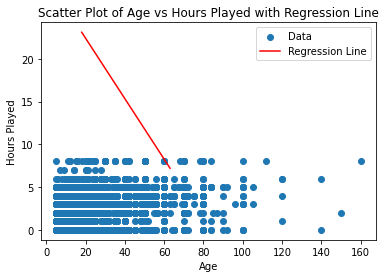

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Scatter plot
plt.scatter(df['Hours'], df['League_Ordinal'], label='Data')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Age'], df['Hours'])
x_values = np.linspace(min(df['Age']), max(df['Age']), 100)
y_values = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Hours Played')
plt.title('Scatter Plot of Age vs Hours Played with Regression Line')
plt.legend()

# Show plot
plt.show()